<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRI  (Principio de relevancia de informacion)**
###  **Parte 1**
En esta seccion se derrolla el metodo del PRI con las siguientes metodologias, teniendo en cuenta la formula del PRI que está determinada por:
\
$$ L[p(X/X_{o})]= H_{2}(X)+\lambda D_{cs}(X,X_{o}) $$
\
minimizando $L$ respecto $X$ se tiene:\
\
$$ J(X)=min_{x}[H_{2}(X)+ \lambda (2H_{2}(X,X_{o})-H_{2}(X)-H(X_{o}))]$$
\
dado que $H_{2}(X_{o})$ es constante se tiene  
\
$$ J(X)=min_{x}[(1-\lambda)H_{2}(X)+2\lambda H_{2}(X,X_{o})]$$ 
\
Antes de realizar la minimizacion se analizan los posibles valores de $\lambda$ siendo de interes el rango comprendido para $1<\lambda<\infty$ , por tanto, se procede con la minimizacion dependiendo de los siguientes casos
\
$$J(X)=-(1-\lambda)log(V(X))-2\lambda log(V(X,X_{o}))$$
\
$$ J(X)= min_{x}[-(1-\lambda)\log(\frac{1}{N^{2}}\sum_{i=1}^{N}\sum_{j=1}^{N}G_{\sigma}(x_{i}-x_{j} ))-2\lambda\log(\frac{1}{NN_{o}}\sum_{i=1}^{N}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{i}-x_{oj})]$$
\
$$\frac{d J(X)}{dx_{k}}=\frac{2(1-\lambda)}{V(X)}F(x_{k})+\frac{2}{V(X,X_{o})}F(x,X_{o})=0$$
\
Donde $F(x_{k})$ y $F(x,X_{o})$ estan definidos como:
\
$$F(x_{k})=\frac{-1}{N \sigma^{2}}\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{k}-x_{j})$$ 
$$F(x;X_{o})=\frac{-1}{N_{o} \sigma^{2}}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})$$ 

1.   FP (punto Fijo)
\
Para esta metodologia se despeja la derivada en terminos de $x_{k}$, dando como resultado:
$$\frac{(1-\lambda)}{NV(X)}\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{j}-x_{k})=\frac{\lambda}{N_{o}V(X,X_{o})}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})$$
\
$$x_{k}(n+1)=c\frac{(1-\lambda)}{\lambda}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})x_{j}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}+\frac{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})x_{oj}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}-c\frac{(1-\lambda)}{\lambda}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})x_{k}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}$$
\
Donde el parametro $c$ corresponde a:
\
\
$c=\frac{N_{o}V(X,X_{o})}{NV(X)}$ 

2.   SGD (Gradiente descendiente estocastico)
\
Para esta metogologia el calculo de $x_{k+1}$ esta dado por:
\
$$x_{k+1}=x_{k}-\gamma \frac{d J(X)}{dx_{k}}$$
\
$$x_{k+1}=x_{k}-\gamma( \frac{2(1-\lambda)}{V(X)}F(x_{k})+\frac{2}{V(X,X_{o})}F(x,X_{o}))$$
3.   SGD por mini lotes





**Sincronizar el cuaderno de python con el github**

In [16]:
!git clone https://github.com/Bryan0122/PRI.git

Cloning into 'PRI'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


**Importar el directorio de el repositorio sincronizado**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Importar las librerias necesarias**

In [0]:
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, SpectralClustering
from main_functions import PRI,MiniBatchPRI,spectralClustering
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin


**Cargar las bases de datos**

In [0]:
data=sio.loadmat(DB)['DB'][0,0]
be_2=data['be2']
sc=SpectralClustering(n_clusters=2,n_neighbors=5,gamma = 1000)
sc.fit(be_2)
labels_be2=sc.labels_
happy=data['happy']
sc=SpectralClustering(n_clusters=3,n_neighbors=5,gamma = 1000)
sc.fit(happy)
labels_happy=sc.labels_
moons,labels_moons = datasets.make_moons(n_samples=300, noise=.05)

**Graficar las bases de datos**

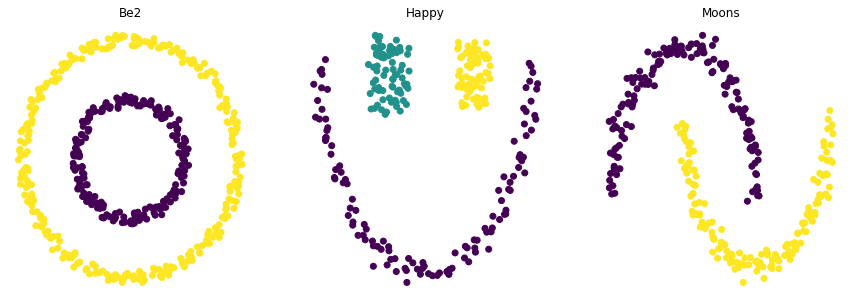

In [4]:
plt.figure(figsize=(15,5))
# BE2
ax1=plt.subplot(131)
ax1=plt.scatter(be_2[:,0],be_2[:,1],c=labels_be2)
ax1=plt.title('Be2')
ax1=plt.axis('off')
# Happy
ax2=plt.subplot(132)
ax2=plt.scatter(happy[:,0],happy[:,1],c=labels_happy)
ax2=plt.title('Happy')
ax2=plt.axis('off')
# Moons
ax3=plt.subplot(133)
ax3=plt.scatter(moons[:,0],moons[:,1],c=labels_moons)
ax3=plt.title('Moons')
ax3=plt.axis('off')
plt.show()

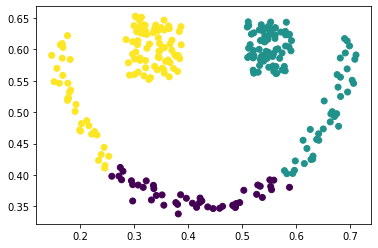

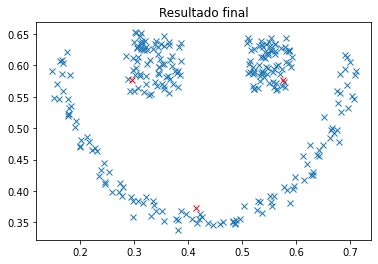

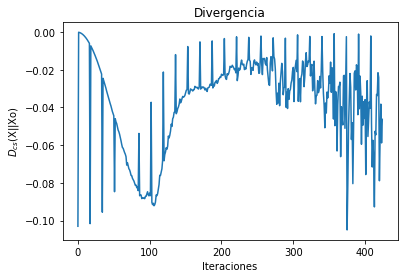

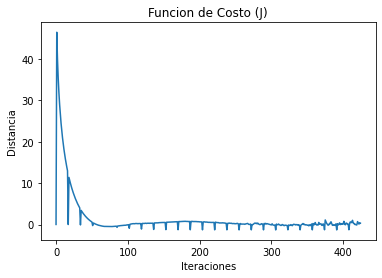

In [21]:

data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
# p = PRI(n_groups=3, lambda_=15, sigma_initial=30,
#        method = "SGD", reduction_ = False, optimization ='Nadam')
p = MiniBatchPRI(n_groups = 3, lambda_ = 15,
                 sigma_initial = 70, reduction_ = True)
data = sio.loadmat(DB)['DB'][0, 0]
be_2 = data['happy']
p.fit(be_2)
p.results()